In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()

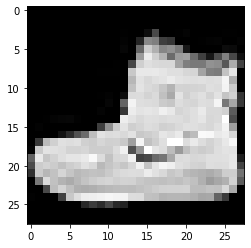

In [3]:
plt.imshow(X_train[0],cmap='gray')

In [4]:
L, W, H = X_train.shape
X_train = X_train.reshape(-1,W*H)
X_test = X_test.reshape(-1,W*H)

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [7]:
model = models.Sequential()

In [21]:
model.add(layers.Dense(100,activation='relu',input_shape=(W*H,)))
model.add(layers.Dropout(0.5)) # 절반을 가지치겠단 소리
model.add(layers.Dense(50,activation='relu')) # input_shape는 처음에만 넣어야함
model.add(layers.Dropout(0.25)) 
model.add(layers.Dense(10,activation='softmax'))

model.compile('sgd','categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=20, batch_size=100,validation_split=0.2)

model_eval=model.evaluate(X_test,Y_test, batch_size=100)
print('Loss:{}, Accuracy:{}'.format(*model_eval))

Epoch 1/20
480/480 [==============================] - 1s 3ms/step - loss: 2.1238 - accuracy: 0.3698 - val_loss: 1.8334 - val_accuracy: 0.8565
Epoch 2/20
480/480 [==============================] - 1s 2ms/step - loss: 1.5470 - accuracy: 0.7397 - val_loss: 1.0100 - val_accuracy: 0.8789
Epoch 3/20
480/480 [==============================] - 1s 2ms/step - loss: 0.9120 - accuracy: 0.8442 - val_loss: 0.5472 - val_accuracy: 0.8789
Epoch 4/20
480/480 [==============================] - 1s 2ms/step - loss: 0.6337 - accuracy: 0.8708 - val_loss: 0.4374 - val_accuracy: 0.8822
Epoch 5/20
480/480 [==============================] - 1s 2ms/step - loss: 0.5274 - accuracy: 0.8804 - val_loss: 0.4261 - val_accuracy: 0.8787
Epoch 6/20
480/480 [==============================] - 1s 2ms/step - loss: 0.4816 - accuracy: 0.8847 - val_loss: 0.4126 - val_accuracy: 0.8807
Epoch 7/20
480/480 [==============================] - 1s 2ms/step - loss: 0.4574 - accuracy: 0.8871 - val_loss: 0.4068 - val_accuracy: 0.8830
Epoch 

In [9]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training,Validation'])
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training,Validation'])

In [10]:
history = model.fit(X_train,Y_train,epochs=50,batch_size=100,validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 1s 2ms/step - loss: 0.3751 - accuracy: 0.8697 - val_loss: 0.3951 - val_accuracy: 0.8641
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8707 - val_loss: 0.3933 - val_accuracy: 0.8629
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.3678 - accuracy: 0.8723 - val_loss: 0.3851 - val_accuracy: 0.8658
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8730 - val_loss: 0.3864 - val_accuracy: 0.8674
Epoch 5/50
480/480 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8731 - val_loss: 0.3919 - val_accuracy: 0.8627
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8750 - val_loss: 0.3893 - val_accuracy: 0.8687
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.3551 - accuracy: 0.8761 - val_loss: 0.3786 - val_accuracy: 0.8678
Epoch 

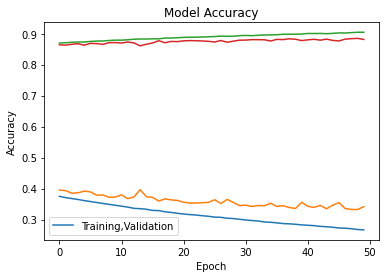

In [22]:
plot_loss(history)
plot_acc(history)

### image Data Plotting

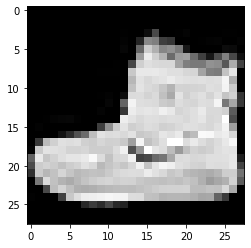

In [12]:
plt.imshow(X_train[0].reshape(W,H),cmap='gray')

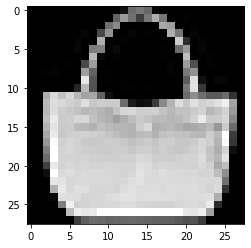

In [13]:
plt.imshow(X_train[100].reshape(W,H),cmap='gray')

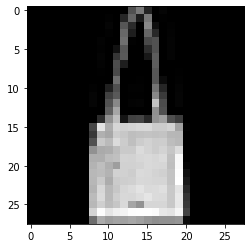

In [14]:
plt.imshow(X_train[200].reshape(W,H),cmap='gray')

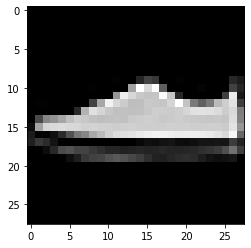

In [15]:
plt.imshow(X_train[20000].reshape(W,H),cmap='gray')

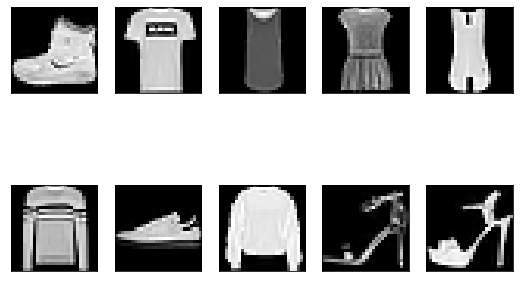

In [20]:
row = 2
col = 5

grid = range(10)
fig,axs = plt.subplots(nrows= row, ncols= col, figsize=(9,6),
           subplot_kw={'xticks':[],'yticks':[]})


for ax, idx in zip(axs.flat,grid):
    ax.imshow(X_train[idx].reshape(W,H), cmap='gray')
    
plt.show()